In [1]:
# train model 1
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

2025-07-08 20:45:40.666583: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
from module.dataloader import create_generators

data_dir = "data/baseline"
train_gen, val_gen = create_generators(
    data_dir,
    img_size=(224, 224),   
    batch_size=16,
    val_split=0.2,
    augment=False
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [4]:
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

callbacks = [
    EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
]

history = model.fit(
    train_gen,
    epochs=2,
    validation_data=val_gen,
    callbacks=callbacks
)

Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2794s 3s/step - accuracy: 0.7662 - loss: 0.4899 - val_accuracy: 0.9352 - val_loss: 0.1610
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2614s 3s/step - accuracy: 0.9320 - loss: 0.2009 - val_accuracy: 0.9540 - val_loss: 0.1772


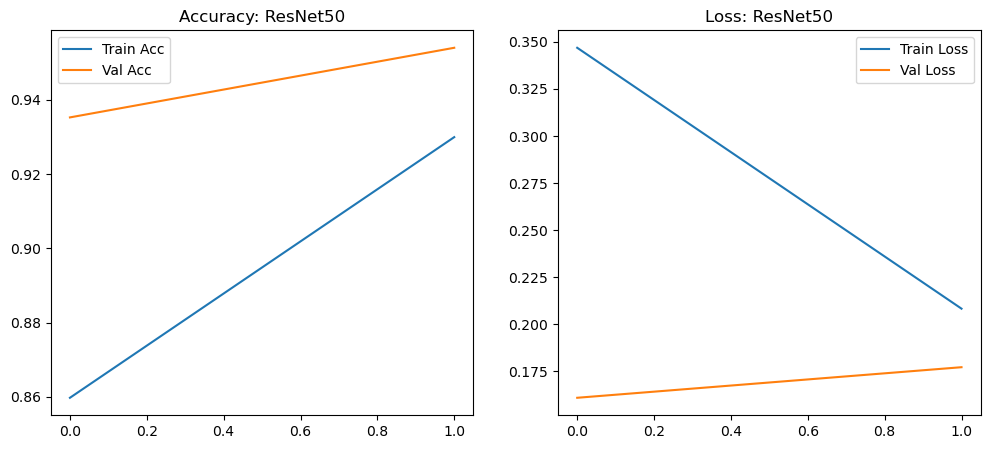

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy: ResNet50')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss: ResNet50')

plt.show()

In [6]:
model.save("models/model1.keras")

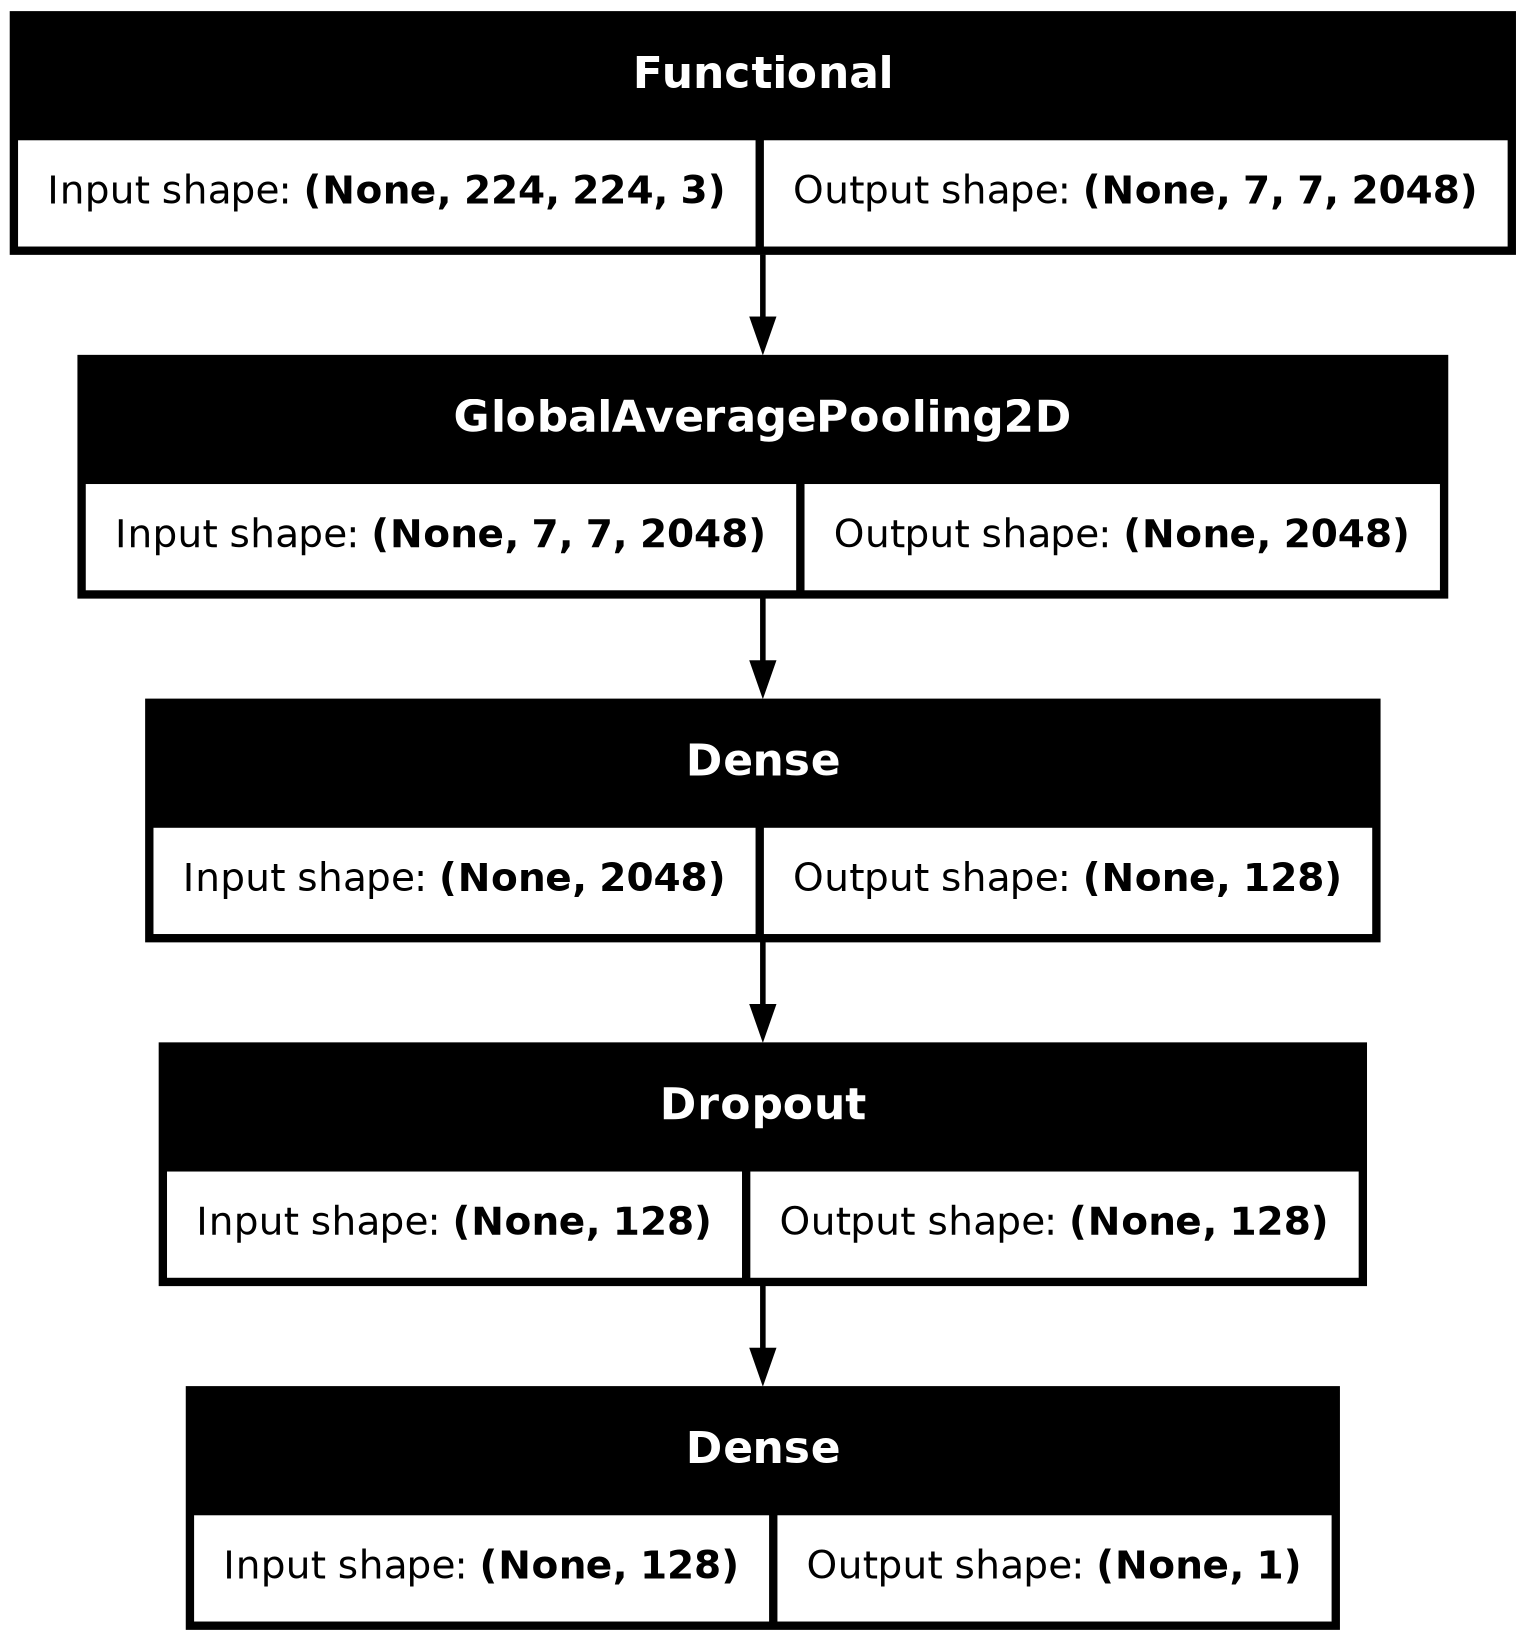

In [7]:
from tensorflow import keras
from IPython.display import Image, display

# Output model architecture
keras.utils.plot_model(model, show_shapes=True, to_file="models/model1.png")
display(Image(filename="models/model1.png", width=450))  

In [ ]:
# end of model 1 build and tests 